# Investigating possible NP effects in Rare $B$ meson decays using EOS

### By Romy O'Connor, Maastricht University 

My thesis involves the investigation of New Physics in rare $B$ meson decays, specifically $B^0_s \to \mu^+ \mu^-$ and $B \to K^{(*)}\mu^+\mu^-$. This notebook serves as the companion scripts or methodolgy required to reproduce the fits presented in the paper.

Anomalies in rare $B$ decays are presented as discrepancies between theory predictions dictated by the Standard Model and experimental measurments. An investigation into these discrepanices is made using EOS to characterise the suppression of these decays in the SM and to bring reason as to why they are interesting probes of New Physics.

## The preliminaries - loading the relevant packages

In [1]:
import eos
import numpy as np
import matplotlib.pyplot as plt

The first thing to do before making any type of analysis is to load the EOS package as well as anything else that may help you in your investigations. I have included NumPy and Matplotlib.

# 1. Beginning with $B^0_s \to \mu^+\mu^-$

My thesis involves three types of rare $B$ meson decays: one fully leptonic decay and two semileptonic decays. For a comprehensive overview, I will make three individual analyses starting with the fully leptonic $B^0_s \to \mu^+\mu^-$.

## Listing the observables and making the manual constraints

In [2]:
eos.Observables('B_q->ll')

EOS allows us to view the observables specific to the decay of interest. The contraints of these observables can also be accessed using the input below.

In [3]:
eos.Constraints('B^0_s->mu^+mu^-')

Name,Type
B^0_s->mu^+mu^-::BR@ATLAS-2018A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-2013B,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@CMS-2016A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-2019A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-LHCb-2014,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@LHCb-2013D,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@LHCb-2017A,Gaussian


These are the constraints that are listed (so far) in EOS. You can see that the constraints only involve the branching ratio, with the most recent measurments taken from CMS in 2019. Manual constraints can also be made. This is shown below to account for the most recent measurments taken for the branching ratio in 2021 [arXiv:2103.13370]

In [4]:
eos.Constraints().insert('B^0_s->mu^+mu^-::BR@LHCb-2021A', '''
type: Gaussian
observable: B_q->ll::BR@Untagged
kinematics: {}
options: {l: mu, q: s}
mean: 3.09e-09
sigma-stat: {hi: 0.46e-9, lo: 0.43e-9}
sigma-sys:  {hi: 0.15e-9, lo: 0.11e-9}
dof: 1
''')

This can not only be done for the branching ratio, but for other observables too. Take the effective lifetime, for example [arXiv:2103.13370]

In [5]:
eos.Constraints().insert('B^0_s->mu^+mu^-::eff_lifetime@LHCb-2021A', '''
type: Gaussian
observable: B_q->ll::eff_lifetime
kinematics: {}
options: {l: mu, q: s}
mean: 2.07e+12
sigma-stat: {hi: 0.29e+12, lo: -0.29e+12}
sigma-sys:  {hi: 0.03e+9, lo: -0.03e+9}
dof: 1
''')

Now we have two manally inputted constraints involving the $B^0_s \to \mu^+ \mu^-$ decay! These can be observed together by following the input below. We can see our manual constraints at the bottom of the list.

In [6]:
eos.Constraints('B^0_s->mu^+mu^-')

Name,Type
B^0_s->mu^+mu^-::BR@ATLAS-2018A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-2013B,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@CMS-2016A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-2019A,Gaussian
B^0_s->mu^+mu^-::BR@CMS-LHCb-2014,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@LHCb-2013D,"Amoroso (physical limit, theta, alpha, beta)"
B^0_s->mu^+mu^-::BR@LHCb-2017A,Gaussian
B^0_s->mu^+mu^-::BR@LHCb-2021A,Gaussian
B^0_s->mu^+mu^-::eff_lifetime@LHCb-2021A,Gaussian


## Listing the relevant parameters

To begin our investigation, the relevent parameters should first be evaluated. This can be done using the input:``eos.Parameters()``. This will display a long list of parameters associated with many different decays. To avoid scrolling through this long list, we can pin point the relevant ones to us using the command below. All of the parameters are in GeV, unless specified otherwise. There are quite a few parameters involved in the decay, but I think that it is usefull to identify them individually. It also allows the user to become better acquainted with EOS.

In [7]:
parameters = eos.Parameters()

In [8]:
parameters['mass::t(pole)']

$$m_t^{\mathrm{pole}}$$,(eos.Parameter)
current value,173.5
default value,173.5


In [9]:
parameters['decay-constant::B_s']

$$f_{\bar{B}_s^0}$$,(eos.Parameter)
current value,0.2307
default value,0.2307


In [10]:
parameters['CKM::abs(V_tb)']

$$|V_{tb}|$$,(eos.Parameter)
current value,1.0
default value,1.0


In [11]:
parameters['CKM::abs(V_ts)']

$$|V_{ts}|$$,(eos.Parameter)
current value,0.04
default value,0.04


In [12]:
parameters['b->smumu::Re{c10}']

"$$\mathrm{Re}\, \mathcal{C}_{10}^{(\mu)}$$",(eos.Parameter)
current value,-4.16611761
default value,-4.16611761


In [13]:
parameters['b->smumu::Re{cS}']

"$$\mathrm{Re}\, \mathcal{C}_{S}^{(\mu)}$$",(eos.Parameter)
current value,0.0
default value,0.0


In [14]:
parameters['b->smumu::Re{cP}']

"$$\mathrm{Re}\, \mathcal{C}_{P}^{(\mu)}$$",(eos.Parameter)
current value,0.0
default value,0.0


In [15]:
parameters['mass::B_s']

$$m_{B^0_s}$$,(eos.Parameter)
current value,5.36688
default value,5.36688


In [16]:
parameters['mass::W']

$$M_W$$,(eos.Parameter)
current value,80.385
default value,80.385


In [17]:
parameters['mass::Z']

$$M_Z$$,(eos.Parameter)
current value,91.1876
default value,91.1876


In [18]:
parameters['life_time::B_s']

$$\tau_{B_s}$$,(eos.Parameter)
current value,1.516e-12
default value,1.516e-12


## Evaluating the options

When making plots or any sort of evaluation in EOS, one can choose to include `Options`. This allows us to modify the behaviour of the decay, more specifically the parameters at hand. We will be using the `WilsonScan`,`ConstrainedWilsonScan` and `SM` models to parametrize the Wilson coefficients  $C_{10}$ ,  $C_S$  &  $C_P$  for the WET, as well as the inference of $m_t$ from $C_{10}$ and the branching ratio. 

## Theoretical predictions of the observables

It is interesting to note how certain coefficients or observables behave in the SM. It also forces us to ask the question of why certain components do not contribute at all or are suppressed... perhaps they contribute differently at energy scales beyond the Standard Model? This could suggest that aspects of the decays contain hints this New Physics behavior beyond the Standard Model.

In [19]:
BranchingRatio = eos.Observable.make('B_q->ll::BR',
        eos.Parameters(),
        eos.Kinematics(),
        eos.Options(model= 'SM',q='s', l='mu')
)
display(BranchingRatio)

In [20]:
EffectiveLifetime = eos.Observable.make('B_q->ll::eff_lifetime',
        eos.Parameters(),
        eos.Kinematics(),
        eos.Options(model='SM',q='s', l='mu')
)
display(EffectiveLifetime)

In [21]:
CPAsymmetry = eos.Observable.make('B_q->ll::A_DeltaGamma',
        eos.Parameters(),
        eos.Kinematics(),
        eos.Options(model='SM',q='s', l='mu')
)
display(CPAsymmetry)

## 1D fits: Variation of the  branching ratio with  $Re(\mathcal{C}_{10})$ and the scalar and pseudoscalar operators

Using the plot type 'observable' we can easily see in the SM how the relevant Wilson coefficients are constrained when plotted against the branching ratio.

### 1. $\rm{Re}(\mathcal{C}_{10})$ and the branching ratio

INFO:EOS:   plotting EOS observable "B_q->ll::BR;l=mu,q=s,model=WilsonScan"


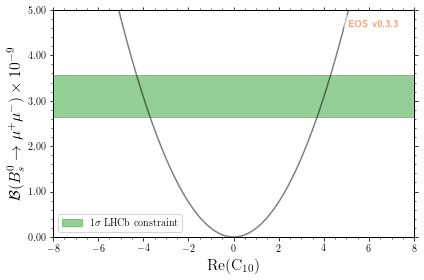

In [22]:
plot_args={
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-8, 8.0], 'format': '${x:.0f}$'},
        'y': { 'label': r'$\mathcal{B}(B^0_s\to\mu^+\mu^-)\times{10}^{-9}$', 'range': [0.0e-9,  5e-9], 'format': '${x:.2f}$', 'scale':1e-9},
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
            
            'type': 'observable',
            'observable': 'B_q->ll::BR;l=mu,q=s,model=WilsonScan',
            'parameter': 'b->smumu::Re{c10}',
            'color': 'black',
            'range': [-8, 8.0],
        },

        {
          'label': r'$1\sigma$ LHCb constraint', 'type': 'constraint2D','color':'C2',
          'constraint': 'B^0_s->mu^+mu^-::BR@LHCb-2021A',
          'y': {
              'observable': 'B_q->ll::BR@Untagged',
              'options': {'q': 's', 'l': 'mu'}
          }
        },

    ]
}
eos.plot.Plotter(plot_args,'SM_BRC10.png').plot()

The green band shows the experiementally allowed region of $1\sigma$.

### 2. $\rm{Re}(\mathcal{C}_{S})$  (unconstrained) and the branching ratio

INFO:EOS:   plotting EOS observable "B_q->ll::BR;l=mu,q=s,model=WilsonScan"


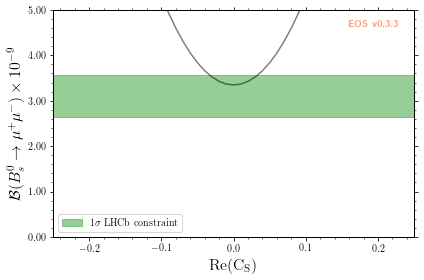

In [23]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{S})$', 'range': [-0.25, 0.25], 'format': '${x:.0f}$'},
        'y': { 'label': r'$\mathcal{B}(B^0_s\to\mu^+\mu^-)\times{10}^{-9}$',  'range': [0.0e-9,  5.0e-9], 'format': '${x:.2f}$', 'scale':1e-9},
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
            
            'type': 'observable',
            'observable': 'B_q->ll::BR;l=mu,q=s,model=WilsonScan',
            'parameter': 'b->smumu::Re{cS}',
            'color': 'black',
            'range': [-0.5, 0.5],
        },

        {
          'label': r'$1\sigma$ LHCb constraint', 'type': 'constraint2D','color':'C2',
          'constraint': 'B^0_s->mu^+mu^-::BR@LHCb-2021A',
          'y': {
              'observable': 'B_q->ll::BR@Untagged',
              'options': {'q': 's', 'l': 'mu'}
          }
       },

    ]
}
eos.plot.Plotter(plot_args, 'SM_BRCS.png').plot()

### 3.  $\rm{Re}(\mathcal{C}_{S})$ (constrained) and the branching ratio

INFO:EOS:   plotting EOS observable "B_q->ll::BR;l=mu,q=s,model=ConstrainedWilsonScan"


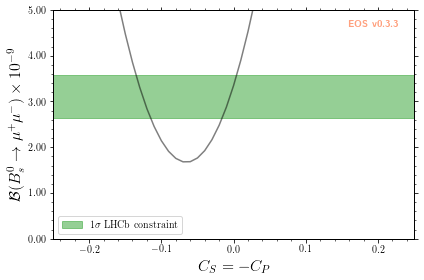

In [24]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_{S}=-C_{P}$', 'range': [-0.25, 0.25], 'format': '${x:.0f}$'},
        'y': { 'label': r'$\mathcal{B}(B^0_s\to\mu^+\mu^-)\times{10}^{-9}$',  'range': [0.0e-9,  5.0e-9], 'format': '${x:.2f}$', 'scale':1e-9},
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
            
            'type': 'observable', 
            'observable': 'B_q->ll::BR;l=mu,q=s,model=ConstrainedWilsonScan',
            'parameter': 'b->smumu::Re{cS}',
            'color': 'black',
            'range': [-0.5, 0.5],
        },
         {
        
          'label': r'$1\sigma$ LHCb constraint', 'type': 'constraint2D','color':'C2',
          'constraint': 'B^0_s->mu^+mu^-::BR@LHCb-2021A',
          'y': {
              'observable': 'B_q->ll::BR@Untagged',
              'options': {'q': 's', 'l': 'mu'}
          }
           
        },

    ]
}
eos.plot.Plotter(plot_args,'SM_BRCSconstrained.png').plot()

### 4. $\rm{Re}(\mathcal{C}_{P})$ (unconstrained) and the branching ratio

INFO:EOS:   plotting EOS observable "B_q->ll::BR;l=mu,q=s,model=WilsonScan"


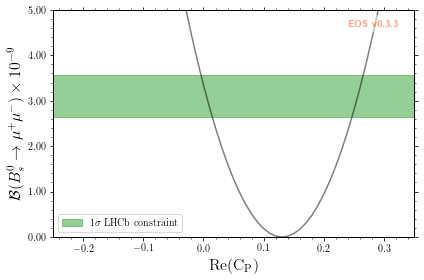

In [25]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{P})$', 'range': [-0.25, 0.35], 'format': '${x:.0f}$'},
        'y': { 'label': r'$\mathcal{B}(B^0_s\to\mu^+\mu^-)\times{10}^{-9}$',  'range': [0.0e-9,  5.0e-9], 'format': '${x:.2f}$', 'scale':1e-9},
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
            
            'type': 'observable',
            'observable': 'B_q->ll::BR;l=mu,q=s,model=WilsonScan',
            'parameter': 'b->smumu::Re{cP}',
            'color': 'black',
            'range': [-0.5, 0.5],
        },

        {
          'label': r'$1\sigma$ LHCb constraint', 'type': 'constraint2D','color':'C2',
          'constraint': 'B^0_s->mu^+mu^-::BR@LHCb-2021A',
          'y': {
              'observable': 'B_q->ll::BR@Untagged',
              'options': {'q': 's', 'l': 'mu'}
          }
       },

    ]
}
eos.plot.Plotter(plot_args, 'SM_BRCP.png').plot()

### 5. $\rm{Re}(\mathcal{C'}_{P})$ (constrained) and the branching ratio

INFO:EOS:   plotting EOS observable "B_q->ll::BR;l=mu,q=s,model=WilsonScan"


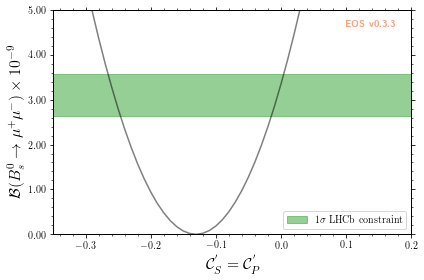

In [26]:
plot_args = {
    'plot': {
        'x': { 'label': r"$\mathcal{C}_{S}^{'} = \mathcal{C}_{P}^{'}$", 'range': [-0.35, 0.2], 'format': '${x:.0f}$'},
        'y': { 'label': r'$\mathcal{B}(B^0_s\to\mu^+\mu^-)\times{10}^{-9}$',  'range': [0.0e-9,  5.0e-9], 'format': '${x:.2f}$', 'scale':1e-9},
        'legend': { 'location': 'lower right' }
    },
    'contents': [
        {
            
            'type': 'observable',
            'observable': 'B_q->ll::BR;l=mu,q=s,model=WilsonScan',
            'parameter': "b->smumu::Re{cP'}",
            'color': 'black',
            'range': [-0.5, 0.5],
        },

        {
          'label': r'$1\sigma$ LHCb constraint', 'type': 'constraint2D','color':'C2',
          'constraint': 'B^0_s->mu^+mu^-::BR@LHCb-2021A',
          'y': {
              'observable': 'B_q->ll::BR@Untagged',
              'options': {'q': 's', 'l': 'mu'}
          }
       },

    ]
}
eos.plot.Plotter(plot_args, 'SM_BRCPconstrained.png').plot()

# Creating a statistical analysis: Posterior inference

This section of the notebook involves finding $m_t$ from the given constraints of the branching ratio. We infer the mean value and its standard deviation. We can create an analysis by following the input below.

In [27]:
analysis_args = {
    'global_options': { 'model': 'SM' },
    'priors': [
        {'parameter':'mass::t(pole)', 'min': 120.0, 'max': 200.0, 'type': 'uniform'},

    ],
    'likelihood': [
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A',
        'B^0_s->mu^+mu^-::BR@CMS-2019A'  ,
        'B^0_s->mu^+mu^-::BR@LHCb-2017A',
    ]
}
analysis = eos.Analysis(**analysis_args)
analysis.parameters['mass::t(pole)'].set(100)

INFO:EOS:Creating analysis with 1 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 28 parameter(s) that do not appear in the prior; check prior?


For the top mass inference the `SM` model is used to provide parameteric access to the mass through the parameter type `mass::t(pole)`. This is the Bayesian prior and the likelihood is the constraints of the branching ratio from ATLAS, CMS and LHCb experimental measurments.

Using `analysis.optimize` we can get the best fit point of $m_t$:

In [28]:
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

INFO:EOS:Optimization goal achieved after 20 function evaluations


parameter,value
$m_t^{\mathrm{pole}}$,162.3846


Next we can sample from the posterior which means that we can obtain posterior estimates for the top mass. The Markov chain Monte Carlo method samples from this posterior distribution. 

In [29]:
param_values  = np.unique(np.concatenate((np.linspace(0.02,  1.00, 20), np.linspace(1.00, 11.60, 20))))
mu_obs       = [eos.Observable.make(
                  'B_q->ll::BR', analysis.parameters, eos.Kinematics(),
                  options=eos.Options(l='mu',q='s',model='SM'))]
parameter_samples, log_weights, mu_samples  = analysis.sample(N=20000, stride=5, pre_N=1000, preruns=5, start_point=bfp.point, observables=mu_obs)

INFO:EOS:Prerun 0 out of 5
INFO:EOS:Prerun 0: acceptance rate is  70%
INFO:EOS:Prerun 1 out of 5
INFO:EOS:Prerun 1: acceptance rate is  38%
INFO:EOS:Prerun 2 out of 5
INFO:EOS:Prerun 2: acceptance rate is  33%
INFO:EOS:Prerun 3 out of 5
INFO:EOS:Prerun 3: acceptance rate is  33%
INFO:EOS:Prerun 4 out of 5
INFO:EOS:Prerun 4: acceptance rate is  34%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  33%


Using the above we produced posterior-predictive samples for the branching ratio. The inclusion of 20,000 samples with stride 5 means that 100,000 samples are produced, improving the overall quality of the returned samples. The values for the posterior are generated using `log_weights` and the posterior predictive samples for the branching ratio is generated using `mu_samples`.

Now we can visualise the distribution of samples using the above! $m_t$ can be inspected using a histogram and kernel densitiy estimate. 

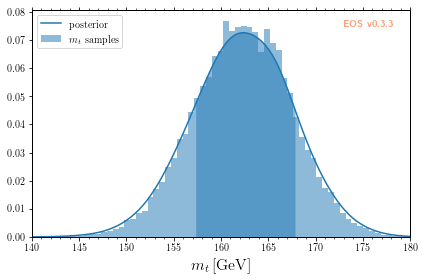

In [30]:
plot_args = {
    'plot': {
        'x': { 'label': r'$m_t$','unit': r'$\rm{GeV}$', 'range': [140, 180] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'type': 'histogram','label':'$m_t$ samples',
            'data': { 'samples': parameter_samples[:, 0], 'log_weights': log_weights }
        },
        {
            'type': 'kde', 'color': 'C0', 'label': 'posterior', 'bandwidth': 2,
            'range': [140, 180],
            'data': { 'samples': parameter_samples[:, 0], 'log_weights': log_weights }
        },
            
        
    ]
}
eos.plot.Plotter(plot_args, 'topmassinference.png').plot()

## 2D fits: Investigating the deviations from Standard Model predictions - fits to Wilson coefficients

In this section of the notebook, experimental and theoretical correlations between different observables and Wilson coefficients are made. We focus on their theoretical uncertainties and their sensitivity to New Physics. In order to fully investigate the effects of NP global fits should be made. In the case of this thesis an example of a 'global fit' is illustrated. 

Before every plot an analysis is made. The global options ensure that our choice of Wilson coefficient parameterization is used throughout, and because we are using the coefficients, the ``WilsonScan`` model is used throughout. In the case of the (pseudo)scalar coefficients, ``ConstrainedWilsonScan`` is used.  We provide the parameters in our analysis through the specifications of the Bayesian priors. The likelihood is defined through a list of constraints, which includes our manually inputted BR constraints from LHCb 2021, aswell as CMS and ATLAS measurments from 2019 and 2018. It is important to note that in order to made a good analysis, you should include more likelihoods than parameters. We will not include both BR constraints from LHCb 2017 and 2021 in one analysis because the 2021 BR measurment is a combination of both.

### 1. $C_S$, $C_{10}$ and the branching ratio (unconstrained)

In [31]:
LHCb_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter': 'b->smumu::Re{cS}','min':-5, 'max':+5, 'type': 'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'      
    ] 
    
}
analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'}

    ],
    
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A','B^0_s->mu^+mu^-::BR@CMS-2019A', 'B^0_s->mu^+mu^-::BR@ATLAS-2018A' 
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?


In [32]:
samples1,_=analysis1.sample(N=10000,preruns=10,pre_N=40000)
samples2,_=analysis2.sample(N=10000,preruns=10,pre_N=40000)
samples3,_=analysis3.sample(N=10000,preruns=10,pre_N=40000)
samples,_=analysis.sample(N=10000,preruns=10,pre_N=40000)

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   3%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  11%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  13%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  15%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  16%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  16%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  16%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  16%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  15%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  16%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  28%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   5%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  17%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  17%
INF

In [33]:
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

INFO:EOS:Optimization goal achieved after 36 function evaluations


parameter,value
"$\mathrm{Re}\, \mathcal{C}_{10}^{(\mu)}$",3.7355
"$\mathrm{Re}\, \mathcal{C}_{S}^{(\mu)}$",-0.0263


We use the `histogram2D` plot type. The constraint of $C_S$ and $C_{10}$ will appear as a ring in the histogram. The plot below tells us the shape of the data but not so much the region of probability. The histogram should be of uniform distribution.

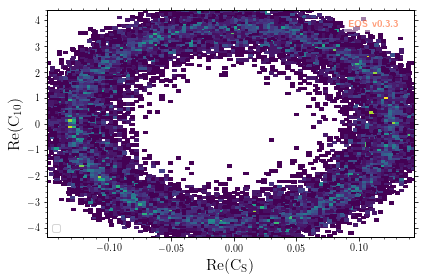

In [34]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{S})$' ,'range': [-15.0, +15.0] },
        'y': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-7.0, +7.0]},
        'legend':{'location': 'lower left'}
        
    },
    'contents': [
        
              {
            'type': 'histogram2D', 
            'data': { 'samples': samples1[:, (1,0)], }
        },
             {
            'type': 'histogram2D', 
            'data': { 'samples': samples2[:, (1,0)], }
        },
            {
            'type': 'histogram2D', 
            'data': { 'samples': samples3[:, (1,0)], }
        },
          {
            'type': 'histogram2D', 
            'data': { 'samples': samples[:, (1,0)], }
        },

        
    ] 
            
}
eos.plot.Plotter(plot_args).plot()

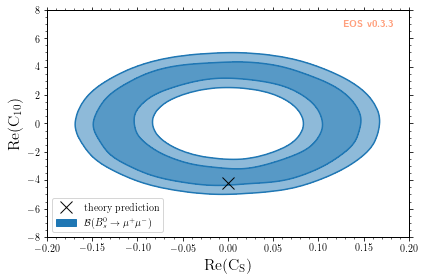

In [35]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{S})$' ,'range': [-0.2, +0.2] },
        'y': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-8, +8]},
        'legend':{'location': 'lower left'}
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$',
            'data': { 'samples': samples[:, (1,0)], },'bandwidth': 1,
            'levels': [0,68.2689,95.45], 
            'contours': ['areas','lines']

        },
        {
            'label': 'theory prediction', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': -4.16611761,
            'marker': 'x'
        }

        
    ] 
            
}
eos.plot.Plotter(plot_args,'NormalC10CS.png').plot()

The fit above uses the plotter class `kde2D`. This create a 'smooth' histogram. It uses a Gaussian curve and displays a band width parameter. 

### 2. $C_S$, $C_{10}$ and the branching ratio (constrained)

In [36]:
LHCb_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter': 'b->smumu::Re{cS}','min':-5, 'max':+5, 'type': 'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'      
    ] 
    
}
analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'}

    ],
    
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A','B^0_s->mu^+mu^-::BR@CMS-2019A', 'B^0_s->mu^+mu^-::BR@ATLAS-2018A' 
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?


In [37]:
samples1,_=analysis1.sample(N=10000,preruns=10,pre_N=40000)
samples2,_=analysis2.sample(N=10000,preruns=10,pre_N=40000)
samples3,_=analysis3.sample(N=10000,preruns=10,pre_N=40000)
samples,_=analysis.sample(N=10000,preruns=10,pre_N=40000)

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   2%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  12%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  14%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  16%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  16%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  15%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  16%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  15%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  16%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  16%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  28%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   3%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  18%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  17%
INF

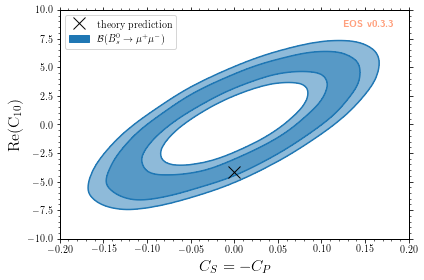

In [38]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_{S}=-C_{P}$' ,'range': [-0.2, +0.2] },
        'y': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-10.0, +10.0]},
        'legend':{'location': 'upper left'}
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$',
            'data': { 'samples': samples[:, (1,0)], },
            'levels': [0,68.2689,95.45],
            'contours': ['areas','lines']

        },
        {
            'label': 'theory prediction', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': -4.16611761,
            'marker': 'x'
        }

        
    ] 
            
}
eos.plot.Plotter(plot_args,'ConstrainedC10CS.png').plot()

The constrained fit makes a distorted ring. The pseudo scalars are essentially 'switched on' to interfere with $C_{10}$.

### 3. $C_S$, $C_P$ and the branching ratio (unconstrained)

In [39]:
LHCb_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter': 'b->smumu::Re{cP}','min':-5, 'max':+5, 'type': 'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':'b->smumu::Re{cP}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':'b->smumu::Re{cP}','min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'      
    ] 
}
analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':'b->smumu::Re{cP}','min':-5,'max':+5,'type':'uniform'}

    ],
    
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A','B^0_s->mu^+mu^-::BR@CMS-2019A','B^0_s->mu^+mu^-::BR@ATLAS-2018A'     
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?


In [40]:
samples1,_=analysis1.sample(N=10000,preruns=10,pre_N=40000)
samples2,_=analysis2.sample(N=10000,preruns=10,pre_N=40000)
samples3,_=analysis3.sample(N=10000,preruns=10,pre_N=40000)
samples,_=analysis.sample(N=10000,preruns=10,pre_N=40000)

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  10%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  13%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  16%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  15%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  16%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  16%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  16%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  16%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  15%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  28%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   1%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  17%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  17%
INF

In [41]:
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

INFO:EOS:Optimization goal achieved after 36 function evaluations


parameter,value
"$\mathrm{Re}\, \mathcal{C}_{S}^{(\mu)}$",0.0885
"$\mathrm{Re}\, \mathcal{C}_{P}^{(\mu)}$",0.0445


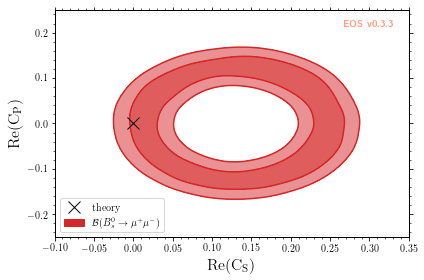

In [42]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{S})$' ,'range': [-0.10, +0.35] },
        'y': { 'label': r'$\rm{Re}(C_{P})$', 'range': [-0.25, +0.25]},
        'legend':{'location': 'lower left'}
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C3', 'label':r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$',
            'data': { 'samples': samples[:, (1,0)], },
            'levels': [0,68.2689,95.45],
            'contours': ['areas','lines'],


        },
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 0.0,
            'marker': 'x'
        }

        
    ] 
            
}
eos.plot.Plotter(plot_args, 'CSCPrelation.png').plot()

### 4.  $C_S$, $C_P$ and the branching ratio (constrained): $C_S$ = $-C_P$ and $C'_S$ = $C'_P$

In [43]:
LHCb_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter': "b->smumu::Re{cS'}",'min':-5, 'max':+5, 'type': 'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':"b->smumu::Re{cS'}",'min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':"b->smumu::Re{cS'}",'min':-5,'max':+5,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'      
    ] 
}
analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'b->smumu::Re{cS}','min':-5,'max':+5,'type':'uniform'},
        {'parameter':"b->smumu::Re{cS'}",'min':-5,'max':+5,'type':'uniform'}

    ],
    
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A','B^0_s->mu^+mu^-::BR@CMS-2019A','B^0_s->mu^+mu^-::BR@ATLAS-2018A'     
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?


In [44]:
samples1,_=analysis1.sample(N=10000,preruns=10,pre_N=40000)
samples2,_=analysis2.sample(N=10000,preruns=10,pre_N=40000)
samples3,_=analysis3.sample(N=10000,preruns=10,pre_N=40000)
samples,_=analysis.sample(N=10000,preruns=10,pre_N=40000)

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  11%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  13%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  16%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  16%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  15%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  16%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  16%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  16%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  16%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  28%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   0%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  17%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  17%
INF

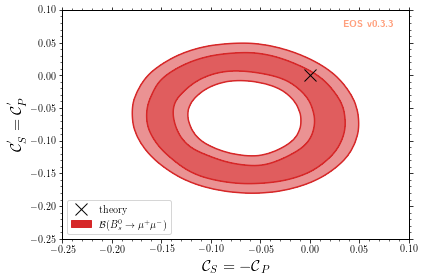

In [45]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\mathcal{C}_{S} = \mathcal{-C}_{P}$' ,'range': [-0.25, +0.10] },
        'y': { 'label': r"$\mathcal{C}_{S}^{'} = \mathcal{C}_{P}^{'}$", 'range': [-0.25, +0.1]},
        'legend':{'location': 'lower left'}
    },
    'contents': [
        
        {
            'type': 'kde2D', 'label': r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$', 'color': 'C3',
            'data': { 'samples': samples[:, (1,0)], },
            'levels': [68.26,95.45],
            'contours': ['areas','lines'],

        },
        
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 0.0,
            'marker': 'x'
        }

        
    ] 
            
}
eos.plot.Plotter(plot_args,'CS_CPConstrained.png').plot()

## Including the effective lifetime:

 ### 5. $C_S$ and $\tau_{eff}$ with the branching ratio (unconstrained)

In [46]:
LHCb_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'     
    ]
}
analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A','B^0_s->mu^+mu^-::BR@CMS-2019A','B^0_s->mu^+mu^-::BR@ATLAS-2018A'    
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

opts=eos.Options(q='s',l='mu', model= 'WilsonScan')
efflifetime1=eos.Observable.make('B_q->ll::eff_lifetime', analysis1.parameters, eos.Kinematics(), opts)
efflifetime2=eos.Observable.make('B_q->ll::eff_lifetime', analysis2.parameters, eos.Kinematics(), opts)
efflifetime3=eos.Observable.make('B_q->ll::eff_lifetime', analysis2.parameters, eos.Kinematics(), opts)
efflifetime=eos.Observable.make('B_q->ll::eff_lifetime', analysis.parameters, eos.Kinematics(), opts)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?


In [47]:
samples1,_,obssamples1=analysis1.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime1])
samples2,_,obssamples2=analysis2.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime2])
samples3,_,obssamples3=analysis3.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime3])
samples,_,obssamples=analysis.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime])

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   3%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  14%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  29%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  36%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  33%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  36%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  31%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  31%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  32%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  32%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  59%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   3%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  18%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  28%
INF

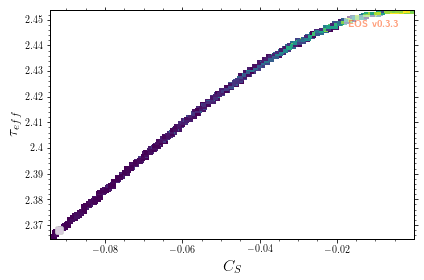

In [48]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_{S}$' ,'range': [-8, +0] },
        'y': { 'label': r'$\tau_{eff}$', 'range': [2.3e+12, 2.55e+12], 'scale': 1e+12},
        'legend':{'location': 'lower left'}
    },
    'contents': [
        
              {
            'type': 'histogram2D', 
            'data': { 'samples': np.vstack((samples1[:, 1],obssamples1[:, 0])).T, }
        },
             {
            'type': 'histogram2D', 
            'data': { 'samples': np.vstack((samples2[:, 1],obssamples2[:, 0])).T, }
        },
            {
            'type': 'histogram2D', 
            'data': { 'samples': np.vstack((samples3[:, 1],obssamples3[:, 0])).T, }
        },
          {
            'type': 'histogram2D', 
            'data': { 'samples': np.vstack((samples[:, 1],obssamples[:, 0])).T, }
        },

        
    ] 
            
}
eos.plot.Plotter(plot_args).plot()

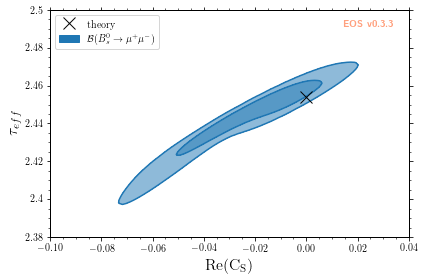

In [49]:
plot_args = {
    'plot': {
        'x': {'label': r'$\rm{Re}(C_{S})$' ,'range': [-0.1, +0.04] },
        'y': { 'label': r'$\tau_{eff}$', 'range': [2.38e+12, 2.5e+12], 'scale': 1e+12},
        'legend':{'location': 'upper left'}
    },
'contents': [
        

        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$',
            'range': [1.5e+12, 2.8e+12], 'levels': [0,68.26,95.45],'bandwidth':3,
            'data': {'samples': np.vstack((samples[:, 1],obssamples[:, 0])).T, },
            'contours': ['areas','lines'],
        },


    
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 2.454e+12,
            'marker': 'x',
            
        }
     
    ] 
            
}
eos.plot.Plotter(plot_args,'Efflifetime_unconstrained.png').plot()

 ### 6. $C_S$ and $\tau_{eff}$ with the branching ratio (constrained)

In [50]:
LHCb_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A'      
    ]
}
CMS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'      
    ]
}
ATLAS_analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'     
    ]
}
analysis_args={
    'global_options':{'model':'ConstrainedWilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{cS}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A','B^0_s->mu^+mu^-::BR@CMS-2019A','B^0_s->mu^+mu^-::BR@ATLAS-2018A'    
    ]
}
analysis1=eos.Analysis(**LHCb_analysis_args)
analysis2=eos.Analysis(**CMS_analysis_args)
analysis3=eos.Analysis(**ATLAS_analysis_args)
analysis=eos.Analysis(**analysis_args)

opts=eos.Options(q='s',l='mu', model= 'ConstrainedWilsonScan')
efflifetime1=eos.Observable.make('B_q->ll::eff_lifetime', analysis1.parameters, eos.Kinematics(), opts)
efflifetime2=eos.Observable.make('B_q->ll::eff_lifetime', analysis2.parameters, eos.Kinematics(), opts)
efflifetime3=eos.Observable.make('B_q->ll::eff_lifetime', analysis2.parameters, eos.Kinematics(), opts)
efflifetime=eos.Observable.make('B_q->ll::eff_lifetime', analysis.parameters, eos.Kinematics(), opts)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 120 parameter(s) that do not appear in the prior; check prior?


In [51]:
samples1,_,obssamples1=analysis1.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime1])
samples2,_,obssamples2=analysis2.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime2])
samples3,_,obssamples3=analysis3.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime3])
samples,_,obssamples=analysis.sample(N=10000,preruns=10,pre_N=40000, observables=[efflifetime])

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   5%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  21%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  25%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  26%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  26%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  27%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  27%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  27%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  27%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  28%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  49%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is   5%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  28%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  29%
INF

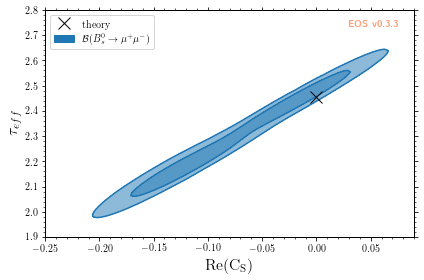

In [52]:
plot_args = {
    'plot': {
        'x': {'label': r'$\rm{Re}(C_{S})$' ,'range': [-0.25, +0.09] },
        'y': { 'label': r'$\tau_{eff}$', 'range': [1.9e+12, 2.8e+12], 'scale': 1e+12},
        'legend':{'location': 'upper left'}
    },
'contents': [
        

        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$\mathcal{B}(B^0_s \to \mu^+\mu^-)$',
            'range': [1.5e+12, 2.8e+12], 'levels': [68.26,95.45],'bandwidth':3,
            'data': {'samples': np.vstack((samples[:, 1],obssamples[:, 0])).T, },
            'contours': ['areas','lines'],
        },

    
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 2.454e+12,
            'marker': 'x',
            
        }
     
    ] 
            
}
eos.plot.Plotter(plot_args,'Efflifetime_constrained.png').plot()

## Theoretical uncertainties and their sensitivity to New Physics : 

### 1. $f_{B_s}$ and $C_{10}$ with the branching ratio

In [53]:
ATLAS_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
         {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
         {'parameter':'b->smumu::Re{c10}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@ATLAS-2018A'      
    ]
}
LHCb2017_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
         {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
         {'parameter':'b->smumu::Re{c10}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A'      
    ]
}
CMS2019_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
         {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
         {'parameter':'b->smumu::Re{c10}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@CMS-2019A'
    ]
}
analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter':'decay-constant::B_s','min':.200,'max':.260,'type':'gaussian', 'central':0.23,'sigma':0.01},
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2017A','B^0_s->mu^+mu^-::BR@ATLAS-2018A', 'B^0_s->mu^+mu^-::BR@CMS-2019A'
        
    ]
}
analysis1=eos.Analysis(**ATLAS_analysis_args)
analysis2=eos.Analysis(**LHCb2017_analysis_args)
analysis3=eos.Analysis(**CMS2019_analysis_args)
analysis=eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 3 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 136 parameter(s) that do not appear in the prior; check prior?


In [54]:
samples1,_=analysis1.sample(N=10000,preruns=10,pre_N=40000)
samples2,_=analysis2.sample(N=10000,preruns=10,pre_N=40000)
samples3,_=analysis3.sample(N=10000,preruns=10,pre_N=40000)
samples,_=analysis.sample(N=10000,preruns=10,pre_N=40000)

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  55%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  27%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  28%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  28%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  28%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  27%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  28%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  28%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  28%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  28%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  50%
INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  50%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  28%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  28%
INF

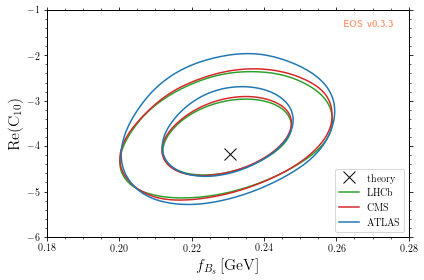

In [55]:
plot_args = {
    'plot': {
        'x': { 'label': r'$f_{B_{s}}$','unit': r'$\rm{GeV}$' ,'range': [.18, 0.28], 'format': '${x:.3f}$' },
        'y': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-6, -1], 'format': '${x:.2f}$' },
        'legend':{'location': 'lower right'}
    },
    'contents': [

              {
            'type': 'kde2D', 'color': 'C2', 'label': 'LHCb',
            'range': [0.18, 0.28], 'levels': [0,68.2689,95.45], 'bandwidth': 3,
            'data': { 'samples': samples2[:, (0,1)], },
            'contours': ['lines']
        },
             {
            'type': 'kde2D', 'color': 'C3', 'label': 'CMS',
            'range': [0.18, 0.28], 'levels': [0,68.2689,95.45], 'bandwidth': 3,
            'data': { 'samples': samples3[:, (0,1)], },
            'contours': ['lines']
        },

        {
            'type': 'kde2D', 'color': 'C0', 'label': 'ATLAS',
            'range': [0.18, 0.28], 'levels': [0,68.2689,95.45], 'bandwidth': 3,
            'data': { 'samples': samples1[:, (0,1)], },
            'contours': ['lines']
        },
        
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.2307,
            'y': -4.16611761,
            'marker': 'x'
        }
        
    ] 
            
}
eos.plot.Plotter(plot_args,'uncertainty_fbs.png').plot()

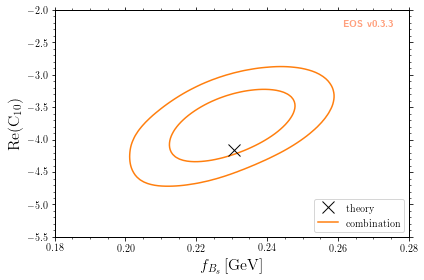

In [56]:
plot_args = {
    'plot': {
        'x': { 'label': r'$f_{B_{s}}$','unit': r'$\rm{GeV}$' ,'range': [.18, 0.28], 'format': '${x:.3f}$' },
        'y': { 'label': r'$\rm{Re}(C_{10})$', 'range': [-5.5, -2], 'format': '${x:.2f}$' },
        'legend':{'location': 'lower right'}
    },
    'contents': [

              {
            'type': 'kde2D', 'color': 'C1', 'label': 'combination',
            'range': [0.18, 0.28], 'levels': [0,68.2689,95.45], 'bandwidth': 3,
            'data': { 'samples': samples[:, (0,1)], },
            'contours': ['lines']
        },
        
        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.2307,
            'y': -4.16611761,
            'marker': 'x'
        }
        
    ] 
            
}
eos.plot.Plotter(plot_args,'uncertaintycombi_fbs.png').plot()

# 2. The decays $B \to K^{(*)}\mu^+\mu^-$

This section of the notebook involves the other $b \to s\ell^+\ell^-$ transitions and their clean observables: $R_K$ and $R_{K^*}$ and respective branching ratios.

## Listing the relevant observables and constraints

In [57]:
eos.Observables('B->Kll')

In [58]:
eos.Constraints('B^+->K^+mu^+mu^-')

Name,Type
"B^+->K^+mu^+mu^-::A_FB[1.00,6.00]@Belle-2009",Gaussian
"B^+->K^+mu^+mu^-::A_FB[1.00,6.00]@CDF-2011",Gaussian
"B^+->K^+mu^+mu^-::A_FB[1.00,6.00]@CDF-2012",Gaussian
"B^+->K^+mu^+mu^-::A_FB[1.00,6.00]@LHCb-2012",Gaussian
"B^+->K^+mu^+mu^-::A_FB[1.10,6.00]@LHCb-2014",Gaussian
"B^+->K^+mu^+mu^-::A_FB[14.18,16.00]@Belle-2009",Gaussian
"B^+->K^+mu^+mu^-::A_FB[14.18,16.00]@CDF-2011",Gaussian
"B^+->K^+mu^+mu^-::A_FB[14.18,16.00]@CDF-2012",Gaussian
"B^+->K^+mu^+mu^-::A_FB[14.18,16.00]@LHCb-2012",Gaussian
"B^+->K^+mu^+mu^-::A_FB[15.00,22.00]@LHCb-2014",Gaussian


A manual constraint is made to include most recent measurment of $R_K$ [arXiv:2103.13370]. 

In [59]:
eos.Constraints().insert('B^+->K^+mu^+mu^-::R_K@LargeRecoilLHCb2021A','''
type: Gaussian
observable: B->Kll::R_K@LargeRecoil
kinematics: {q2_min: 1.1, q2_max: 6}
options: {l: mu}
mean: 0.846
sigma-stat: {hi: +0.042, lo: -0.039}
sigma-sys:  {hi: +0.013, lo: -0.012}
dof: 1
''')

In [60]:
eos.Constraints('B^+->K^*+mu^+mu^-')

Name,Type
"B^+->K^*+mu^+mu^-::BR[1.00,6.00]@CDF-2011",Gaussian
"B^+->K^*+mu^+mu^-::BR[1.00,6.00]@CDF-2012",Gaussian
"B^+->K^*+mu^+mu^-::BR[14.18,16.00]@CDF-2011",Gaussian
"B^+->K^*+mu^+mu^-::BR[14.18,16.00]@CDF-2012",Gaussian
"B^+->K^*+mu^+mu^-::BR[16.00,19.21]@CDF-2011",Gaussian
"B^+->K^*+mu^+mu^-::BR[16.00,19.21]@CDF-2012",Gaussian


A manual constraint is made for $R_{K^*}$, with the value taken from 2017 measurments [arXiv:1704.06240]

In [61]:
eos.Constraints().insert('B^+->K^*+mu^+mu^-::R_K^*@LargeRecoilLHCb2017A','''
type: Gaussian
observable: 'B->K^*ll::R_K^*@LargeRecoil'
kinematics: {q2_min: 1.1, q2_max: 6}
options: {l: mu}
mean: 0.685
sigma-stat: {hi: +0.113, lo: -0.069 }
sigma-sys:  {hi: +0.047, lo: -0.047}
dof: 1
''')

## Making the analysis: 

In [62]:
RK_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter': 'b->smumu::Re{c9}','min':-8, 'max':+8, 'type': 'uniform'},
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        
    ],
    'likelihood':[
        'B^+->K^+mu^+mu^-::R_K@LargeRecoilLHCb2021A',
        
    ]
}
RKstar_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter': 'b->smumu::Re{c9}','min':-8, 'max':+8, 'type': 'uniform'},
        {'parameter':'b->smumu::Re{c10}','min':-8,'max':+8,'type':'uniform'},
        
    ],
    'likelihood':[
        'B^+->K^*+mu^+mu^-::R_K^*@LargeRecoilLHCb2017A',

        
    ]
}
Bsmumu_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
         {'parameter':'b->smumu::Re{c10}','min':-8,'max':0,'type':'uniform'},
    ],
    'likelihood':[
        'B^0_s->mu^+mu^-::BR@LHCb-2021A'
    ]
}
combi_analysis_args={
    'global_options':{'model':'WilsonScan'},
    'priors':[
        {'parameter': 'b->smumu::Re{c9}','min':-8, 'max':+8, 'type': 'uniform'},

        
    ],
    'likelihood':[
          'B^+->K^+mu^+mu^-::R_K@LargeRecoilLHCb2021A', 'B^+->K^*+mu^+mu^-::R_K^*@LargeRecoilLHCb2017A',
    ]

}
analysis1=eos.Analysis(**RK_analysis_args)
analysis2=eos.Analysis(**RKstar_analysis_args)
analysis3=eos.Analysis(**Bsmumu_analysis_args)
analysis4=eos.Analysis(**combi_analysis_args)

INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 148 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 2 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 162 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 1 priors, 1 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 137 parameter(s) that do not appear in the prior; check prior?
INFO:EOS:Creating analysis with 1 priors, 2 EOS-wide constraints, 1 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 175 parameter(s) that do not appear in the prior; check prior?


In [63]:
samples1,_=analysis1.sample(N=5000,preruns=5,pre_N=500)
samples2,_=analysis2.sample(N=5000,preruns=5,pre_N=500)
samples3,_=analysis3.sample(N=5000,preruns=5,pre_N=500)
samples4,_=analysis4.sample(N=5000,preruns=5,pre_N=500)

INFO:EOS:Prerun 0 out of 5
INFO:EOS:Prerun 0: acceptance rate is  13%
INFO:EOS:Prerun 1 out of 5
INFO:EOS:Prerun 1: acceptance rate is   5%
INFO:EOS:Prerun 2 out of 5
INFO:EOS:Prerun 2: acceptance rate is   8%
INFO:EOS:Prerun 3 out of 5
INFO:EOS:Prerun 3: acceptance rate is   7%
INFO:EOS:Prerun 4 out of 5
INFO:EOS:Prerun 4: acceptance rate is   8%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is   9%
INFO:EOS:Prerun 0 out of 5
INFO:EOS:Prerun 0: acceptance rate is  32%
INFO:EOS:Prerun 1 out of 5
INFO:EOS:Prerun 1: acceptance rate is  13%
INFO:EOS:Prerun 2 out of 5
INFO:EOS:Prerun 2: acceptance rate is  18%
INFO:EOS:Prerun 3 out of 5
INFO:EOS:Prerun 3: acceptance rate is  14%
INFO:EOS:Prerun 4 out of 5
INFO:EOS:Prerun 4: acceptance rate is  18%
INFO:EOS:Main run: started ...
INFO:EOS:Main run: acceptance rate is  19%
INFO:EOS:Prerun 0 out of 5
INFO:EOS:Prerun 0: acceptance rate is  47%
INFO:EOS:Prerun 1 out of 5
INFO:EOS:Prerun 1: acceptance rate is  39%
INFO:EOS:Pre

## 1. $R_K$ in $C_{9}$ and $C_{10}$

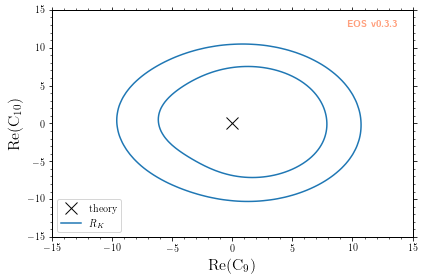

In [64]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}({C}_{9})$' ,'range': [-15.0, +15.0] },
        'y': { 'label': r'$\rm{Re}({C}_{10})$', 'range': [-15.0, +15.0]},
        'legend':{'location': 'lower left'}
        
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$R_K$',
            'range': [-1.5, +1.5], 'levels': [68.27,95.45], 'bandwidth': 3,
            'data': { 'samples': samples1[:, (0,1)], },
            'contours': ['lines']
        },

        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 0.0,
            'marker': 'x'
        }
    ] 
            
}
eos.plot.Plotter(plot_args, 'RK.png').plot()

## 2. $R_{K^*}$ in $C_{9}$ and $C_{10}$

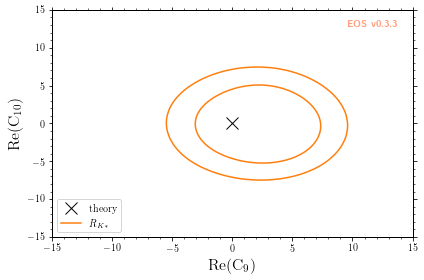

In [65]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}(C_{9})$' ,'range': [-15.0, +15.0] },
        'y': { 'label': r'$\rm{Re}({C}_{10})$', 'range': [-15.0, +15.0]},
        'legend':{'location': 'lower left'}
        
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C1', 'label': r'$R_{K*}$',
            'range': [-1.5, +1.5], 'levels': [68.2689,95.45], 'bandwidth': 3,
            'data': { 'samples': samples2[:, (0,1)], },
            'contours': ['lines']
        },

        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 0.0,
            'marker': 'x'
        }
    ] 
            
}
eos.plot.Plotter(plot_args,'RKstar.png').plot()

## 3. Combined fit of the clean $R_K$, $R_{K^*}$ and $\mathcal{B}(B^0_s \to \mu^+\mu^-)$ observables in the $b \to s\ell^+\ell^-$ transitions

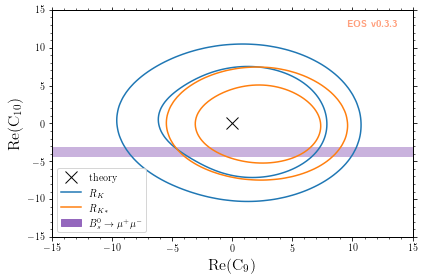

In [66]:
plot_args = {
    'plot': {
        'x': { 'label': r'$\rm{Re}({C}_{9})$' ,'range': [-15.0, +15.0] },
        'y': { 'label': r'$\rm{Re}({C}_{10})$', 'range': [-15.0, +15.0]},
        'legend':{'location': 'lower left'}
        
    },
    'contents': [
        
        {
            'type': 'kde2D', 'color': 'C0', 'label': r'$R_K$',
            'range': [-1.5, +1.5], 'levels': [68.27,95.45], 'bandwidth': 3,
            'data': { 'samples': samples1[:, (0,1)], },
            'contours': ['lines']
        },
        {
            'type': 'kde2D', 'color': 'C1', 'label': r'$R_{K*}$',
            'range': [-1.5, +1.5], 'levels': [68.27,95.45], 'bandwidth': 3,
            'data': { 'samples': samples2[:, (0,1)], },
            'contours': ['lines']
        },

        {
                     
            'label': r'$B^0_s \to \mu^+\mu^-$',
            'type': 'band',
            'color': 'C4',
            'x': [-15,+15],
            'y': [-4.38584136, -3.1524644],
            
            
        },

        {
            'label': 'theory', 
            'type': 'point', 'color': 'black', 'opacity': 5, 'markersize': 12,
            'x': 0.0,
            'y': 0.0,
            'marker': 'x'
        }
    ] 
            
}
eos.plot.Plotter(plot_args, 'global.png').plot()